In [7]:
import tensorflow as tf
import numpy as np

from estimator_svdd_naive import naive_svdd_model_fn

In [4]:
target_w        = 256
batch_size      = 1
train_steps     = 1
model_dir       = "../tmp/estimator_svdd_naive"

In [17]:
# Simulate fake data coming from a flatten layer of a CNN
x_train = np.random.multivariate_normal(mean=[1., 1.], cov=np.eye(2), size=100).astype(np.float32)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=x_train,
    y=None,
    batch_size=50,
    num_epochs=train_steps,
    shuffle=True
)

x_eval = np.vstack([
    np.random.multivariate_normal(mean=[1., 1.], cov=np.eye(2), size=950).astype(np.float32),
    np.random.multivariate_normal(mean=[10., 10.], cov=np.eye(2), size=50).astype(np.float32),
])
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=x_eval,
    y=None,
    batch_size=50,
    num_epochs=train_steps,
    shuffle=True
)

In [39]:
OCClassifier = tf.estimator.Estimator(
    model_fn=naive_svdd_model_fn,
    params={
        "frac_err": 0.1,
        "inputs_nbr": 100,
        "input_size": 10,
        "kernel": "rbf",
        "rffm_dims": 200,
        "rffm_stddev": 25,
    },
    model_dir=None
)

OCClassifier.train(
    input_fn=train_input_fn,
    steps=train_steps
)

In [40]:
predictions = OCClassifier.predict(
    input_fn=test_input_fn
)
predictions_list = np.asarray(list(map(lambda p: p["predicted_classes"], predictions)))

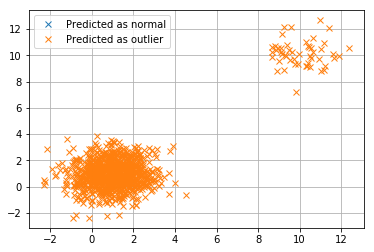

In [41]:
import matplotlib.pyplot as plt

ind_normal = predictions_list > 0
ind_outlier = predictions_list < 0
plt.plot(x_eval[ind_normal, 0], x_eval[ind_normal, 1], "x", label="Predicted as normal")
plt.plot(x_eval[ind_outlier, 0], x_eval[ind_outlier, 1], "x", label="Predicted as outlier")
plt.legend()
g = plt.grid()
plt.show()